In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#出力を小数点以下3桁に抑える
%precision 3 
#Dataframeの出力を小数点以下3桁に抑える
pd.set_option('precision', 3)

#表示されるカラム数を設定
pd.set_option('display.max_columns', 500)

In [2]:
#ワインデータのダウンロード
##必要な機能のimport
import pandas as pd#　                   データフレームを扱うための機能。
from urllib.request import urlretrieve#　ネット上からファイルをダウンロードし保存するのに使う機能。

##インターネットから使うデータをダウンロード。
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"#　データがあるネット上のアドレス。
savepath = "winequality-white.csv"#　保存時のファイル名。
urlretrieve(url, savepath)#　        ネット上の"url"からファイルをダウンロードし、"savepath"の名前で保存。

##使うデータを確認
wine_df = pd.read_csv("winequality-white.csv",sep = ";", encoding = "utf-8")#　csvファイルを読み込む。今回は";"区切りのcsvであるためsep=";"とした。
wine_df# データを表示

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.991,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.995,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.993,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.989,3.34,0.38,12.8,7


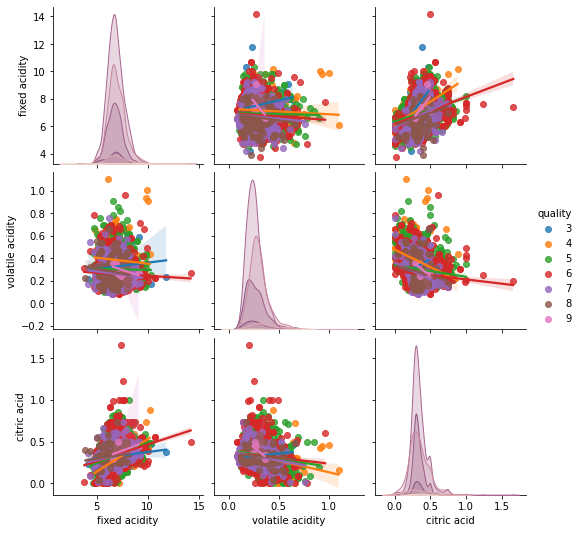

In [6]:
sns.pairplot(wine_df[["fixed acidity", "volatile acidity", "citric acid", "quality"]], hue="quality", kind="reg")

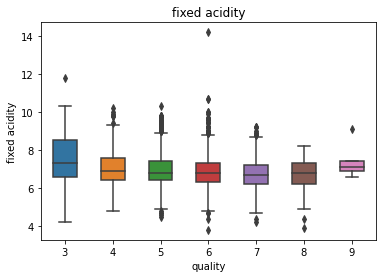

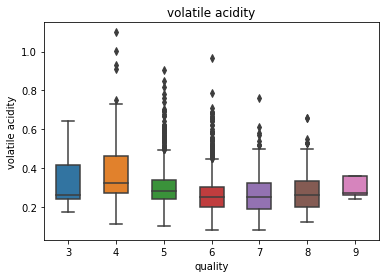

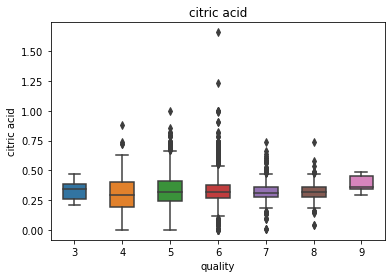

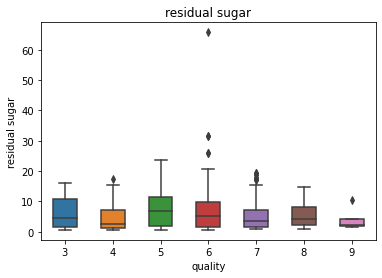

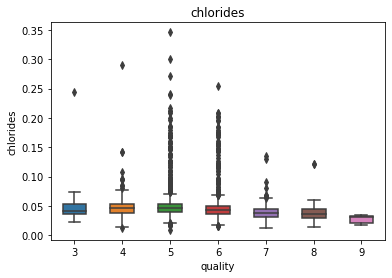

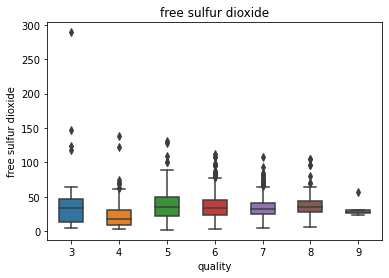

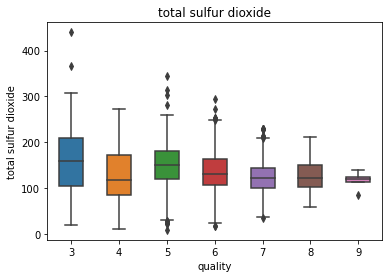

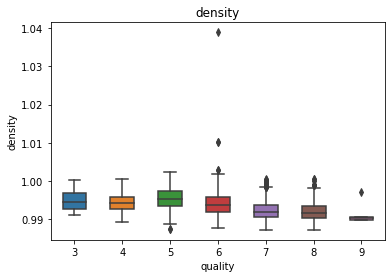

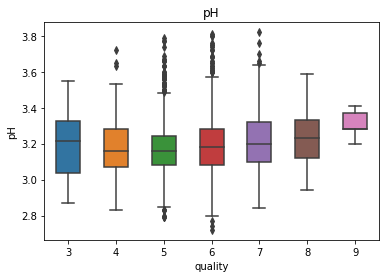

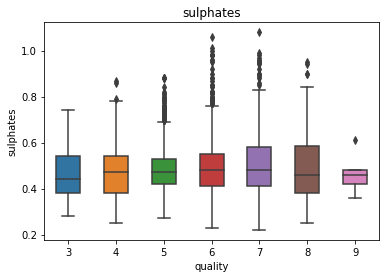

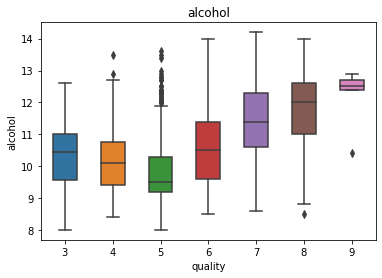

In [14]:
for c in  wine_df.columns[0:11]:
    sns.boxplot(x=wine_df['quality'], y=wine_df[c], width=0.5)
    plt.title(c)   # タイトルを指定する、文字の大きさを指定
    plt.ylabel(c)         # ｙ軸のラベルを指定、文字の大きさを指定
    plt.xlabel("quality")           # ｘ軸のラベルを指定、文字の大きさを指定
    plt.show()

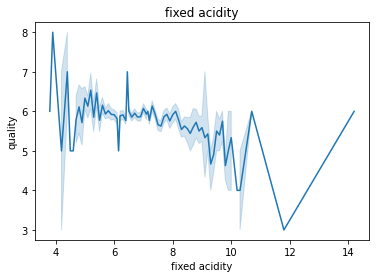

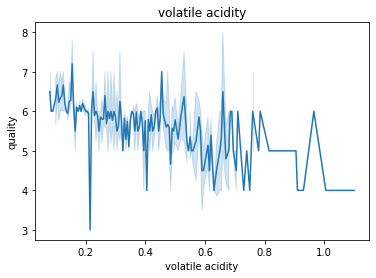

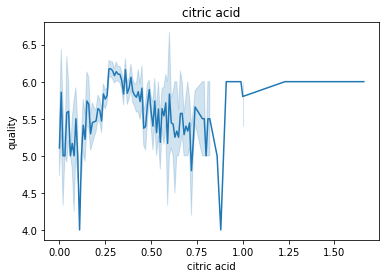

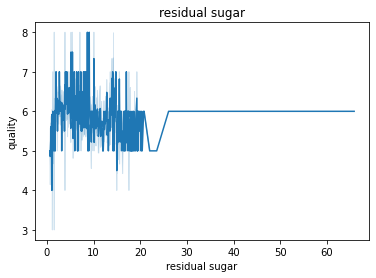

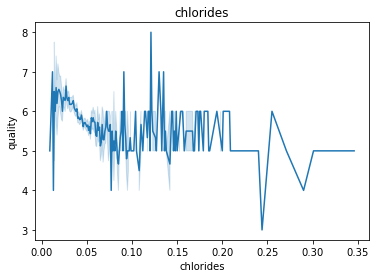

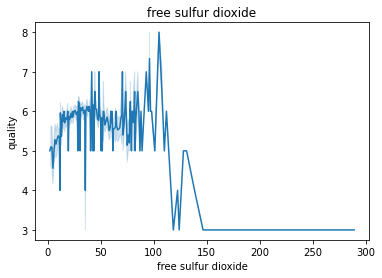

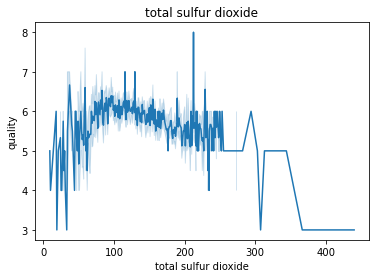

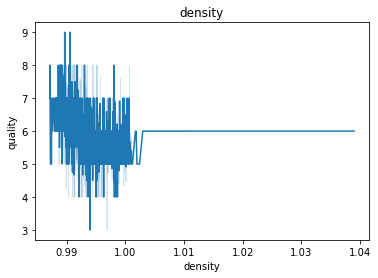

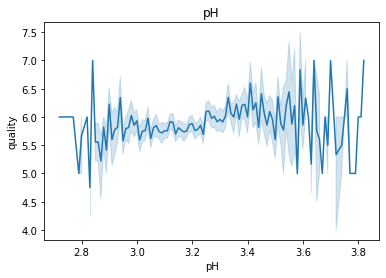

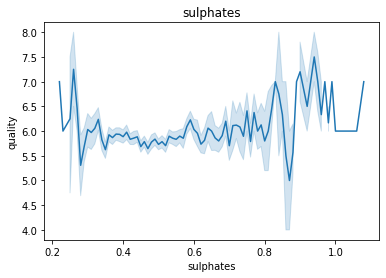

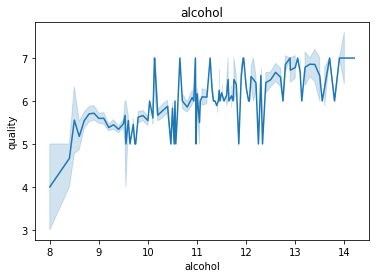

In [19]:
for c in  wine_df.columns[0:11]:
    sns.lineplot(x=c, y='quality', data=wine_df)
    plt.title(c)   # タイトルを指定する、文字の大きさを指定
    plt.ylabel("quality")         # ｙ軸のラベルを指定、文字の大きさを指定
    plt.xlabel(c)           # ｘ軸のラベルを指定、文字の大きさを指定
    plt.show()

In [3]:
from sklearn.ensemble import RandomForestClassifier

y = wine_df["quality"]
X = wine_df.drop(columns=["quality"], inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [4]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_true=y_test, y_pred=y_pred)

0.6948979591836735

In [5]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()

#クロスバリデーション
from sklearn.model_selection import KFold

def scores_cross_val(model, K, X, y):
    scores = []
    kf = KFold(n_splits=K, shuffle=True, random_state=330)
    for tr_idx, va_idx in kf.split(X):
        tr_x, va_x = X.iloc[tr_idx], X.iloc[va_idx]
        tr_y, va_y = y.iloc[tr_idx], y.iloc[va_idx]
        model.fit(tr_x, tr_y)
        va_pred = model.predict(va_x)
        score = accuracy_score(y_true=va_y, y_pred=va_pred)
        scores.append(score)

    return scores

scores_cross_val(rf, 5, X, y), np.mean(scores_cross_val(rf, 5, X, y))

([0.6877551020408164,
  0.6928571428571428,
  0.6846938775510204,
  0.6772216547497446,
  0.686414708886619],
 0.6853790831960977)

In [6]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()

scores_cross_val(lgbm, 5, X, y), np.mean(scores_cross_val(lgbm, 5, X, y))

([0.6755102040816326,
  0.6693877551020408,
  0.6673469387755102,
  0.6659856996935649,
  0.6710929519918284],
 0.6698647099289153)

<AxesSubplot:xlabel='quality', ylabel='Count'>

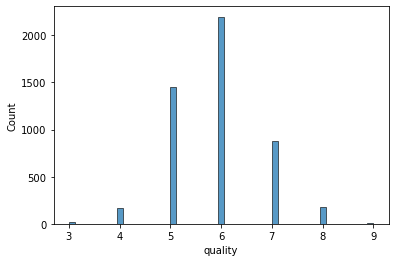

In [18]:
sns.histplot(wine_df["quality"])

In [7]:
y = wine_df["quality"]
X = wine_df.drop(columns=["quality"], inplace=False)

#ラベルを3段階になおす
new_l = []
for v in list(y):
    if v <= 4:
        new_l += [0]
    elif v <=7:
        new_l += [1]
    else:
        new_l += [2]

wine_df["new_quality"] = new_l
y = wine_df["new_quality"]

y

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    1
4895    1
4896    1
4897    1
Name: new_quality, Length: 4898, dtype: int64

In [8]:
rf = RandomForestClassifier()
np.mean(scores_cross_val(rf, 5, X, y))

0.9432400825498739

In [137]:
import optuna

X_train, X_test, y_train, y_test = train_test_split(X, wine_df["new_quality"] ,test_size=0.2)

def objective(trial):
    n_estimators=trial.suggest_int('n_estimators', 100, 200)
    min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10)
    
    rf = RandomForestClassifier(random_state=1, 
                                n_estimators=n_estimators, 
                                min_samples_leaf=min_samples_leaf
                               )

    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    return accuracy_score(y_true=y_test, y_pred=y_pred)*100
 
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)
# study.optimize(objective, timeout=300)

[I 2022-01-10 21:36:28,930] A new study created in memory with name: no-name-7aad1f0c-4de2-49d5-a8cd-701d729eb501
[I 2022-01-10 21:36:29,632] Trial 0 finished with value: 93.16326530612244 and parameters: {'n_estimators': 148, 'min_samples_leaf': 5}. Best is trial 0 with value: 93.16326530612244.
[I 2022-01-10 21:36:30,250] Trial 1 finished with value: 93.26530612244898 and parameters: {'n_estimators': 126, 'min_samples_leaf': 2}. Best is trial 1 with value: 93.26530612244898.
[I 2022-01-10 21:36:30,761] Trial 2 finished with value: 93.06122448979592 and parameters: {'n_estimators': 116, 'min_samples_leaf': 8}. Best is trial 1 with value: 93.26530612244898.
[I 2022-01-10 21:36:31,372] Trial 3 finished with value: 93.06122448979592 and parameters: {'n_estimators': 128, 'min_samples_leaf': 3}. Best is trial 1 with value: 93.26530612244898.
[I 2022-01-10 21:36:32,036] Trial 4 finished with value: 93.26530612244898 and parameters: {'n_estimators': 132, 'min_samples_leaf': 2}. Best is trial

In [138]:
study.best_params

{'n_estimators': 182, 'min_samples_leaf': 1}

In [12]:
rf = RandomForestClassifier(n_estimators=182, min_samples_leaf=1)

l = scores_cross_val(rf, 5, X, y)
print(l)
print(np.mean(l)) 

[0.9469387755102041, 0.9438775510204082, 0.9469387755102041, 0.9295199182839632, 0.9448416751787538]
0.9424233391007066


In [15]:
import joblib 

joblib.dump(rf, 'clf_wine_quality.pkl')

['clf_wine_quality.pkl']